# End-to-End ML Project - Iris Dataset

O Dataset que será usadao foi um dos primeiros a serem utilizados na literatura para avaliação de métodos de classificação. O dataset contém três classes de 50 instâncias cada e onde cada classe refere-se a um tipo de planta iris, sendo elas Iris Setosa, Iris Versicolour ou Iris Virginica.

Uma das classes é lineramente separável das outras duas, e essas duas não são linearmente separáveis uma da outra.

![Flower species](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
#plt.style.use('seaborn-v0_8')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "irisData"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Carregando os dados

In [2]:
IRIS_PATH = os.path.join("datasets")
# cria um pandas dataframe a partir do arquivo csv do dataset
csv_path = os.path.join(IRIS_PATH, "iris.csv")
iris = pd.read_csv(csv_path)

## Observando a estrutura dos dados

In [3]:
iris.head()

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa


In [4]:
iris = iris.drop(columns=['id_planta', 'cidade_origem'])
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  152 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  151 non-null    float64
 3   largura_petala      152 non-null    float64
 4   classe              152 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [6]:
iris["classe"].value_counts()

classe
Iris-versicolor    51
Iris-virginica     51
Iris-setosa        50
Name: count, dtype: int64

In [7]:
iris.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,152.000000,150.000000,151.000000,152.000000
mean,5.942105,3.182000,3.776821,1.197368
std,1.479284,1.692545,1.776455,0.765216
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


Saving figure attribute_histograms_plots


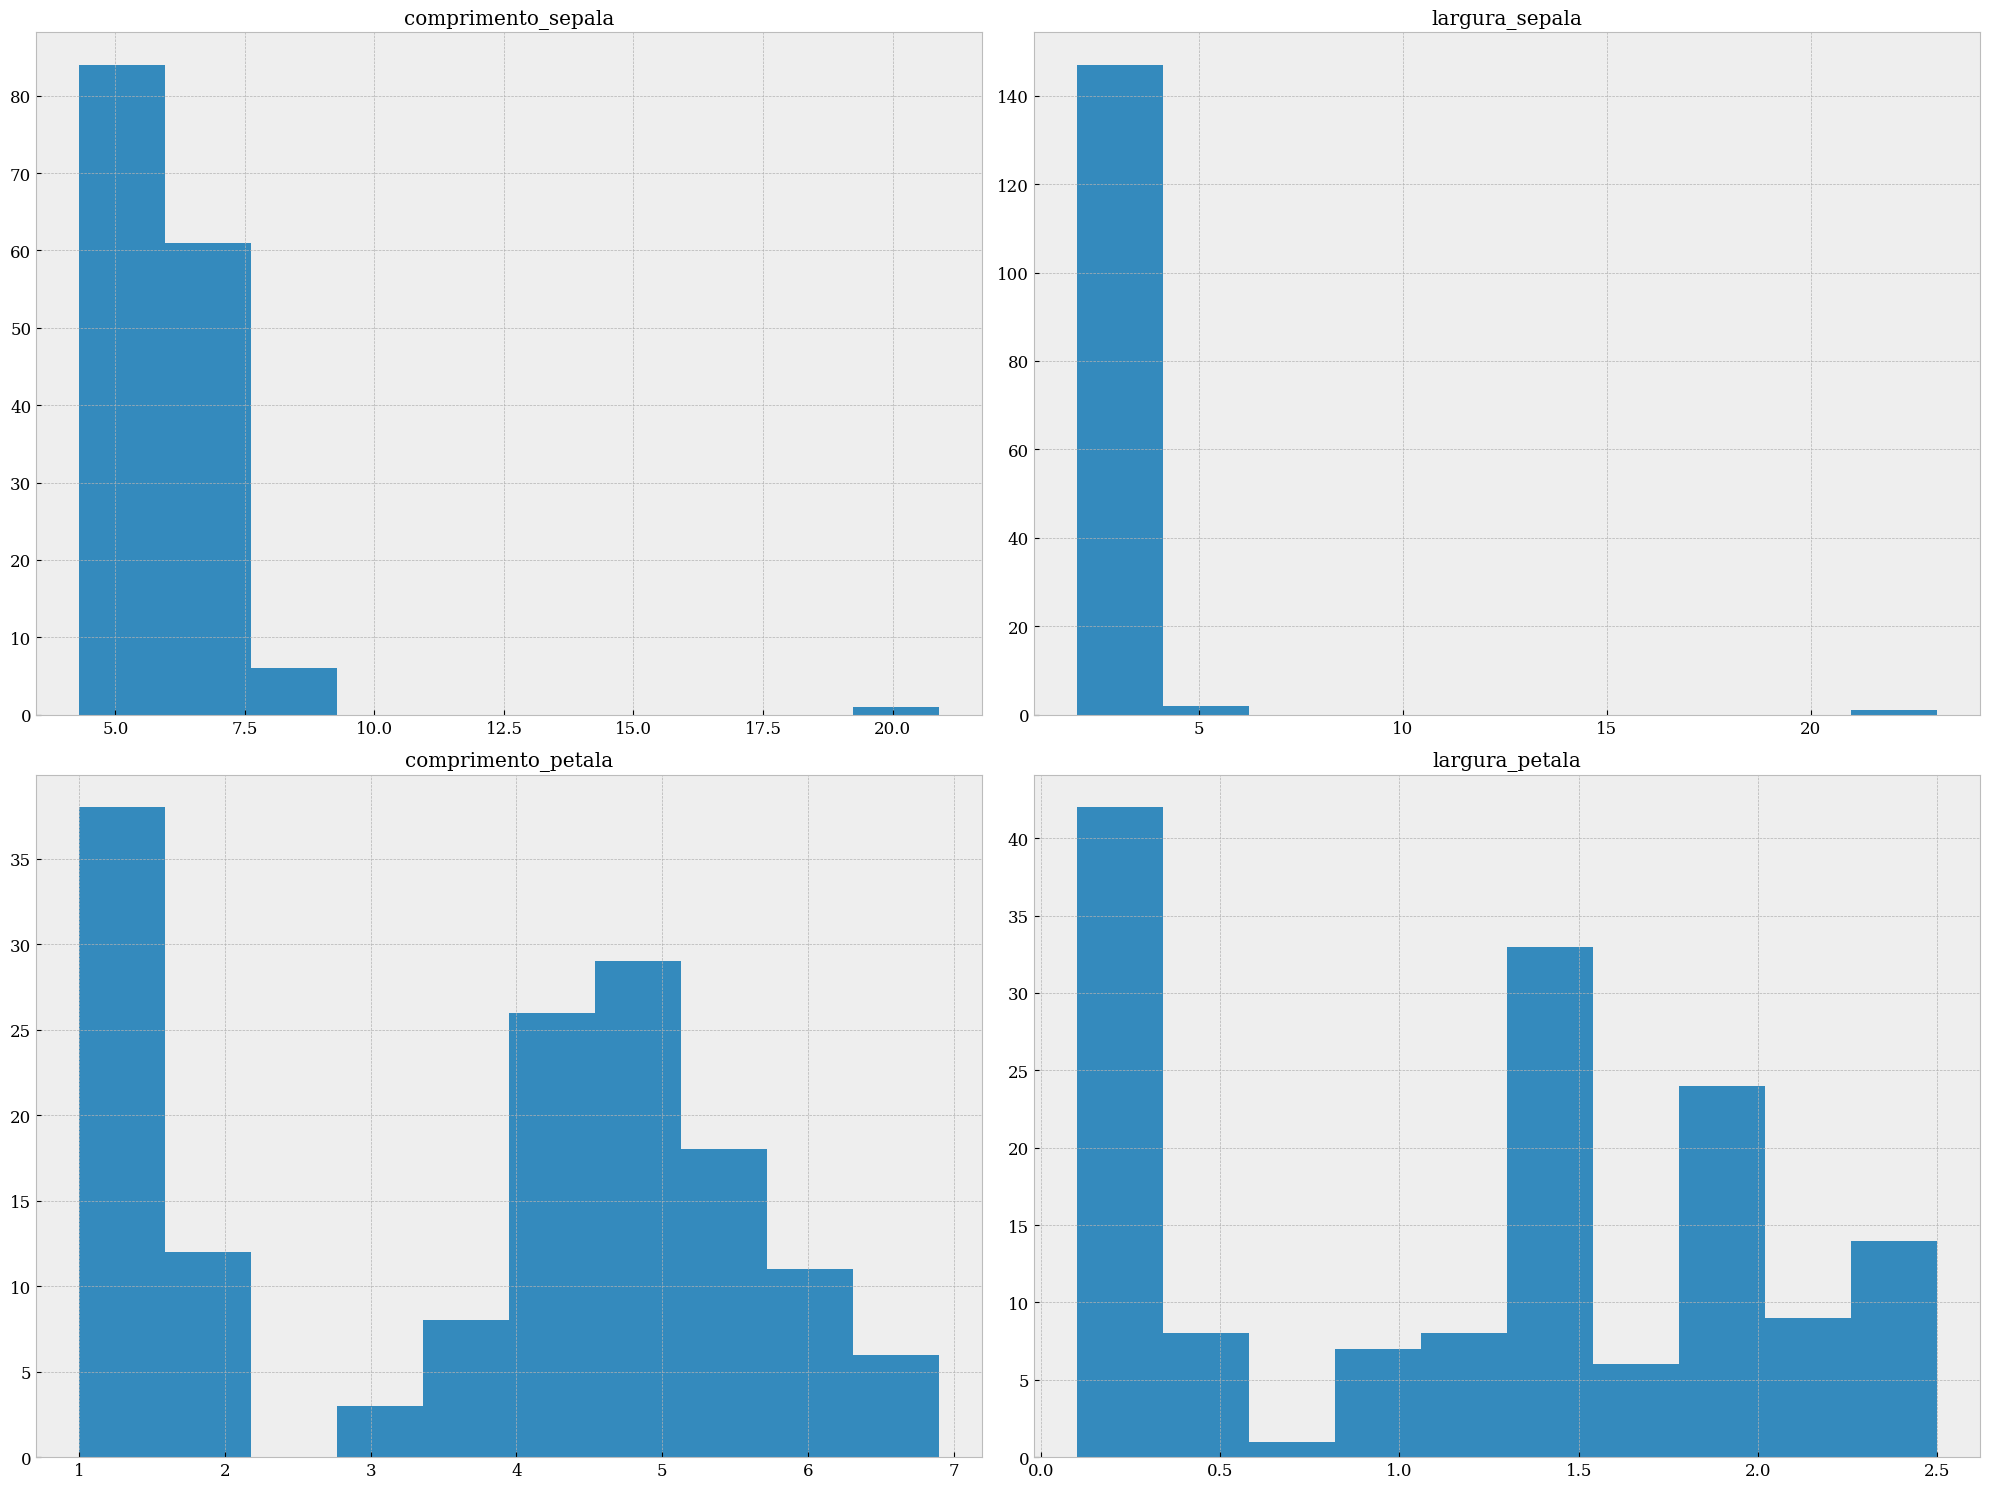

In [8]:
iris.hist(bins=10, figsize=(20,15))
save_fig("attribute_histograms_plots")
plt.show()

<AxesSubplot: >

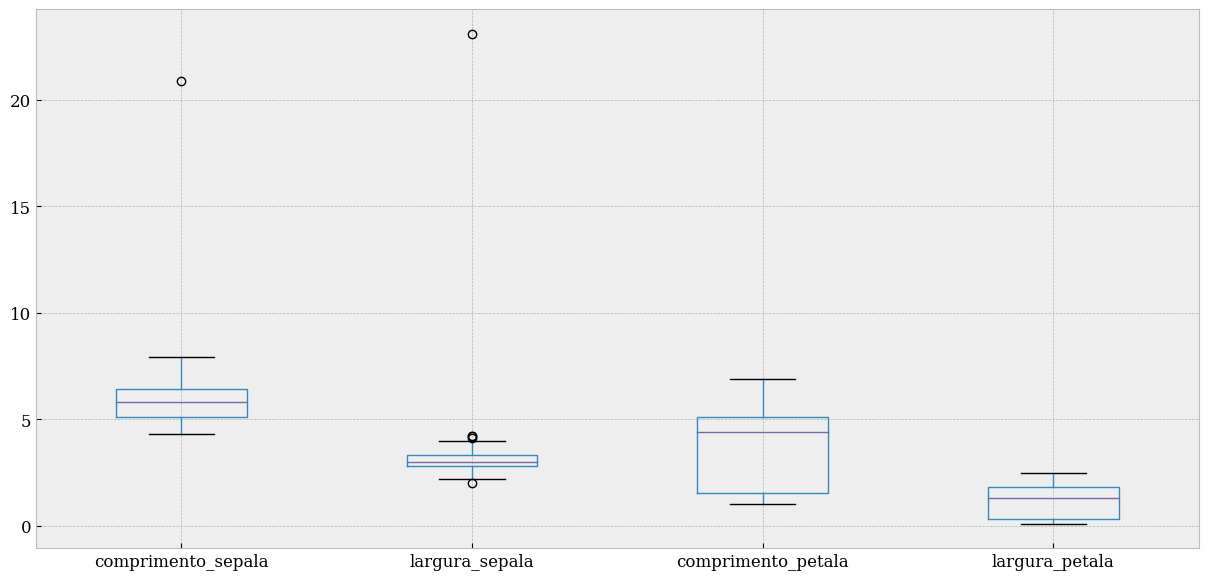

In [9]:
iris.boxplot(figsize=(15,7))

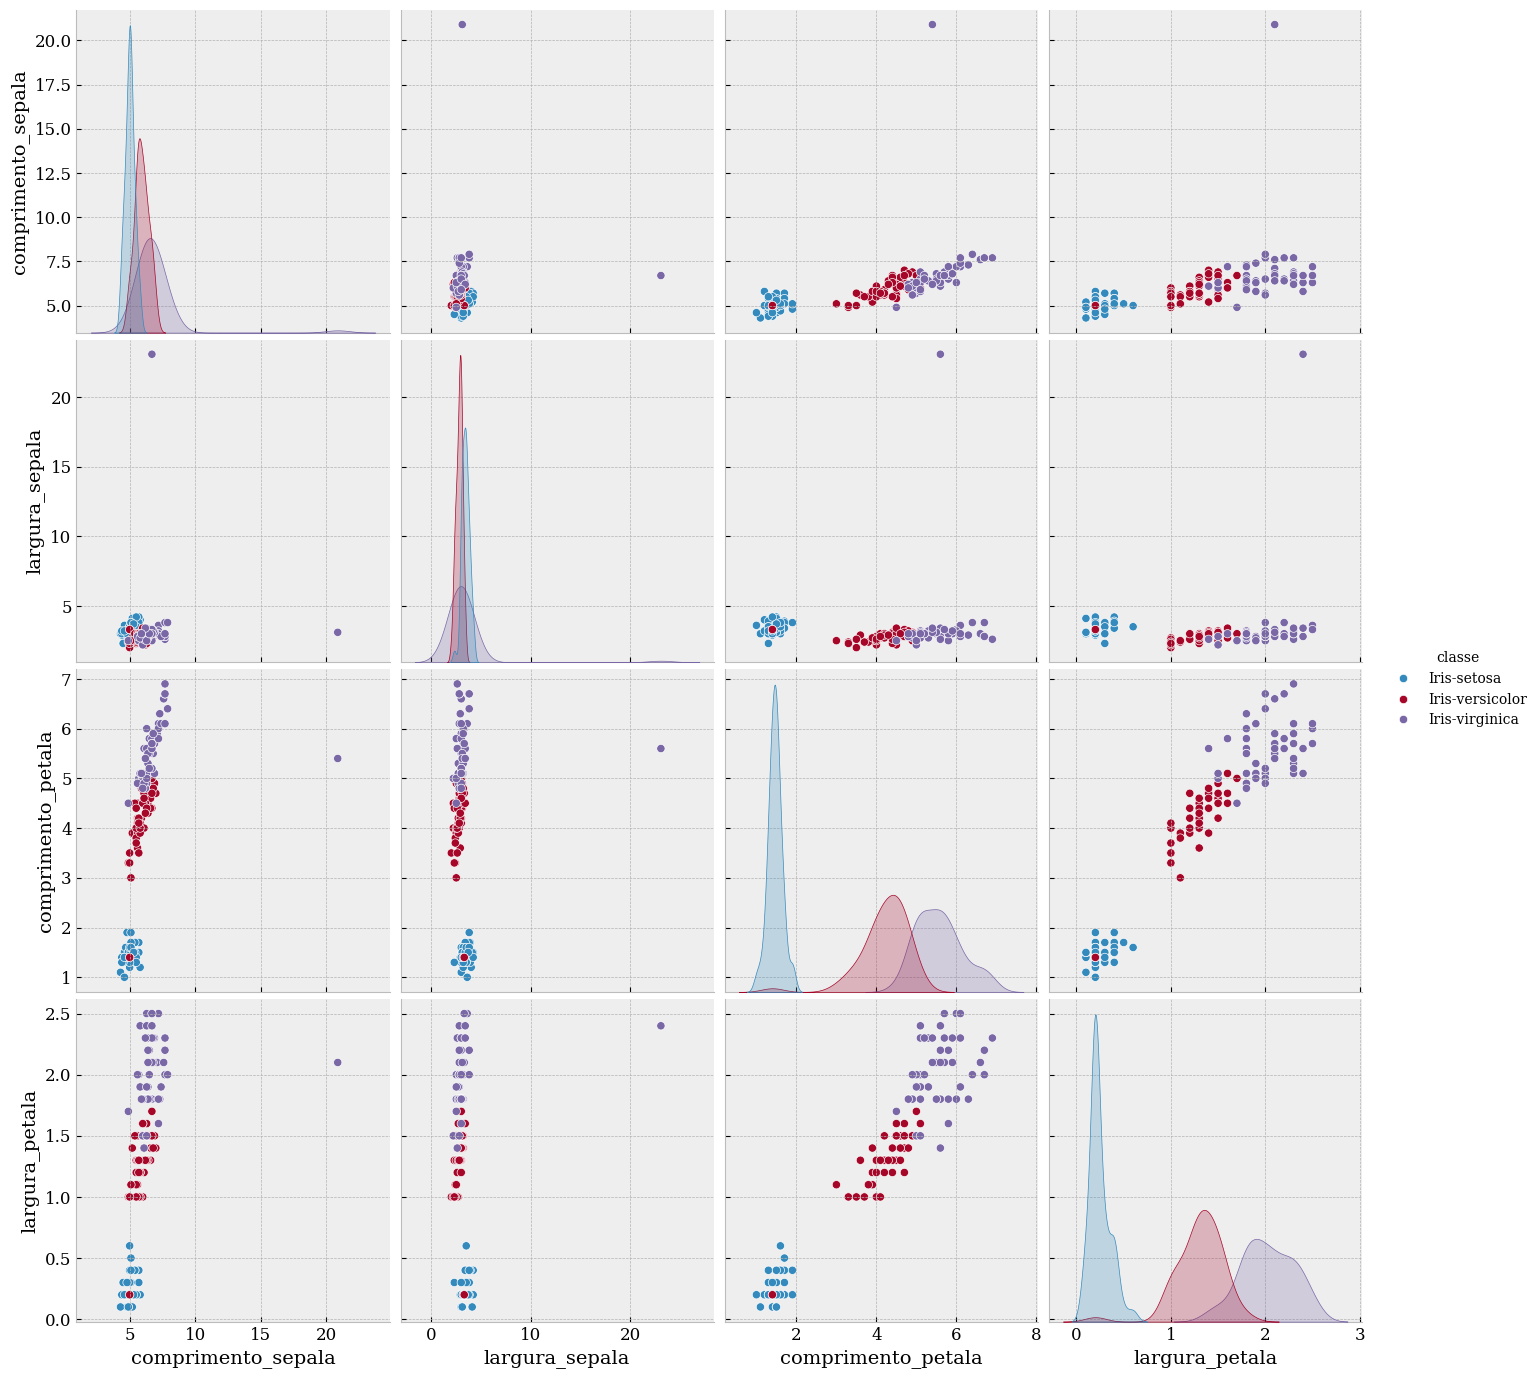

In [10]:
import seaborn as sns

sns.pairplot(iris, hue="classe", height=3.5)

plt.show()


In [11]:
cmapp = sns.color_palette().as_hex()[:3]
print(cmapp)

['#348abd', '#a60628', '#7a68a6']


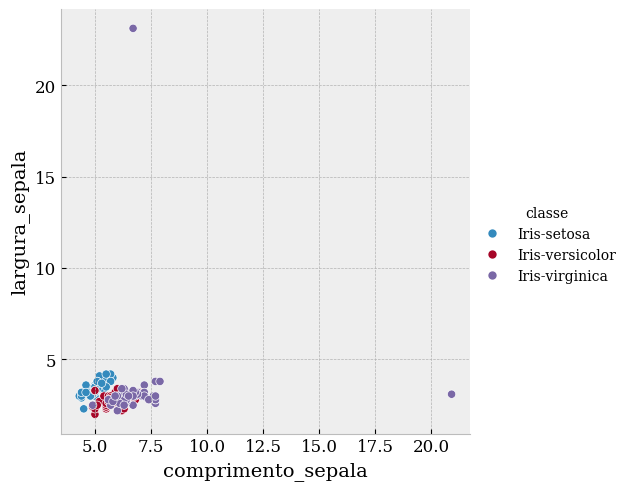

In [12]:
sns.relplot(data=iris, x="comprimento_sepala", y="largura_sepala", hue="classe", height=5)

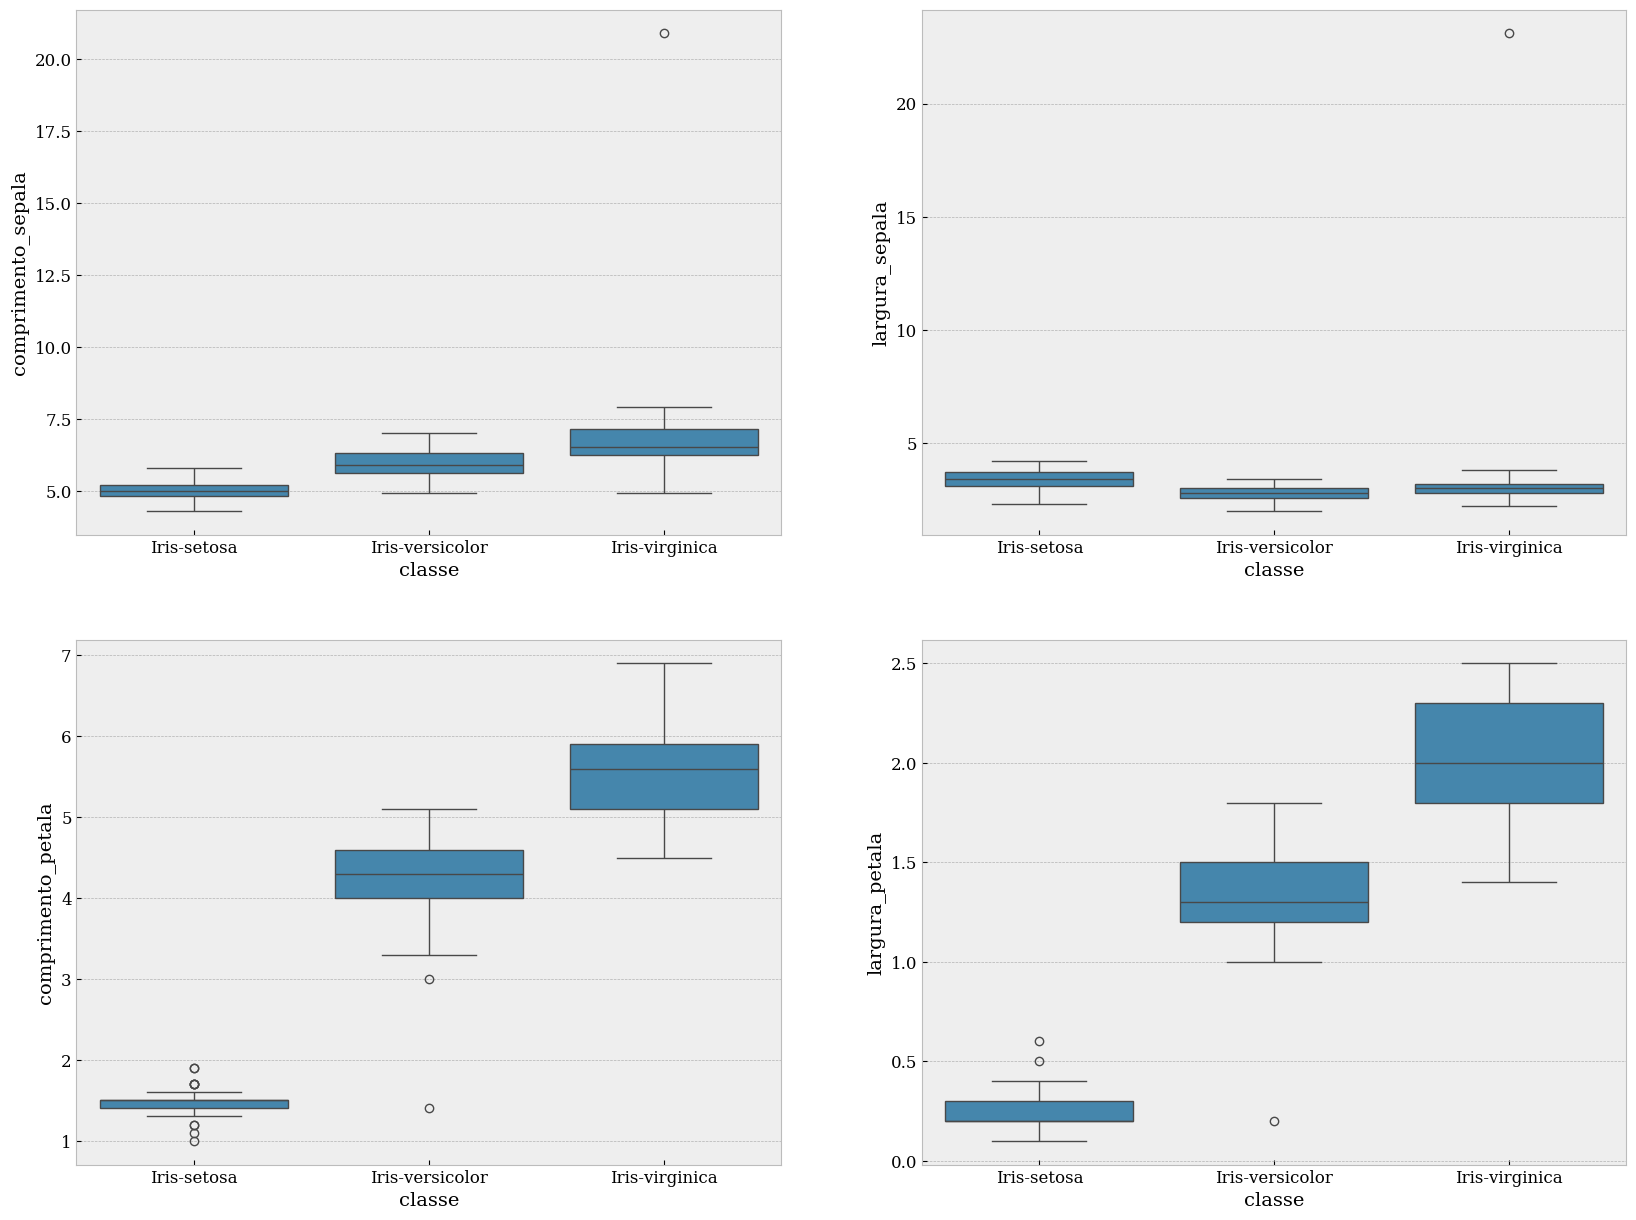

In [13]:
#sns.set_theme()
# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (20,15))
i = 1
for col in iris.columns[:-1]:
    plt.subplot(2, 2, i)
    sns.boxplot(x="classe", y=col, data=iris)
    i += 1
plt.show()

In [14]:
# mostra somente amostras com valores nulos
iris[iris.isna().any(axis=1)]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


### Procurando por coorrelações

In [15]:
iris_copy = iris.copy()
iris_copy = iris_copy.drop(columns='classe')

#iris_copy
corr_matrix = iris_copy.corr()
corr_matrix

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
comprimento_sepala,1.000000,0.025827,0.551456,0.538162
largura_sepala,0.025827,1.000000,-0.026006,0.033660
comprimento_petala,0.551456,-0.026006,1.000000,0.962056
largura_petala,0.538162,0.033660,0.962056,1.000000


## Limpando os dados

Resolver
1. Amostras com atributos nulos
    1. Foi observado que as três instâncias com valores nulos referem-se aos atributos comprimento_petala e largura_sepala, todas elas sendo da classe Iris-setosa, então os valores faltantes serão substituídos pelas médias de cada um desses dois atributos de todas as instâncias da classe Iris-setosa
2. Amostras redundantes
3. Amostras inconsistentes
4. Ruídos (outliers) não serão considerados por conta da quantidade de amostras

### Valores faltantes

In [16]:
def treat_nan(df):
    # separa apenas instancias que não tem elementos faltantes
    valid_ls = df.loc[~df['largura_sepala'].isnull()]
    valid_cp = df.loc[~df['comprimento_petala'].isnull()]

    # calcula a média das colunas cuja classe da amostra seja iris-setosa
    mean_ls = valid_ls[valid_ls['classe'] == 'Iris-setosa']['largura_sepala'].mean()
    mean_cp = valid_cp[valid_cp['classe'] == 'Iris-setosa']['comprimento_petala'].mean()

    #iris[iris['largura_sepala'].isna()]['largura_sepala']
    # substitui os valores nulos pela média
    df.loc[pd.isnull(df['largura_sepala']), 'largura_sepala'] = mean_ls
    df.loc[pd.isnull(df['comprimento_petala']),'comprimento_petala'] = mean_cp

    return df

treat_nan(iris)

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  152 non-null    float64
 1   largura_sepala      152 non-null    float64
 2   comprimento_petala  152 non-null    float64
 3   largura_petala      152 non-null    float64
 4   classe              152 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


### Amostras Redundantes

In [17]:
df_duplicates = iris[ iris.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

df_duplicates

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


In [18]:
def treat_duplicates(df):
    df = df.drop_duplicates(keep = 'first')
    return df

iris = treat_duplicates(iris)

df_duplicates = iris[ iris.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 
df_duplicates

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


In [19]:
def treat_inconsistency(df):
    df = df.drop_duplicates(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'], keep = False)
    return df

iris = treat_inconsistency(iris)
df_duplicates = iris[ iris.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 
df_duplicates

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe


In [20]:
iris.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,5.958219,3.190639,3.795625,1.215753
std,1.493284,1.715087,1.755223,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


### Normalização dos atributos

### Outliers

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$.

## Criando o conjunto de teste

In [21]:
from sklearn.model_selection import train_test_split

X = iris.iloc[:, :-1].to_numpy() # DADOS
y = iris.iloc[:, 4].to_numpy()   # ALVOS

# separar dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Selecionando modelos e treinando os dados

In [41]:
iris.iloc[47:52, :-1]
iris.iloc[45:50, 4]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

some_data = iris.iloc[45:50, :-1].to_numpy()
some_labels = iris.iloc[45:50, 4].to_numpy()

print("Predictions:", list(tree_model.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: ['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
Labels: ['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


In [51]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

ypred = tree_model.predict(X_test) 
score = accuracy_score(y_test, ypred)

print("Accuracy:", score)
print(classification_report(ypred, y_test))
print(confusion_matrix(y_test, ypred))


Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.78      1.00      0.88         7
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.92        30
   weighted avg       0.95      0.93      0.93        30

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


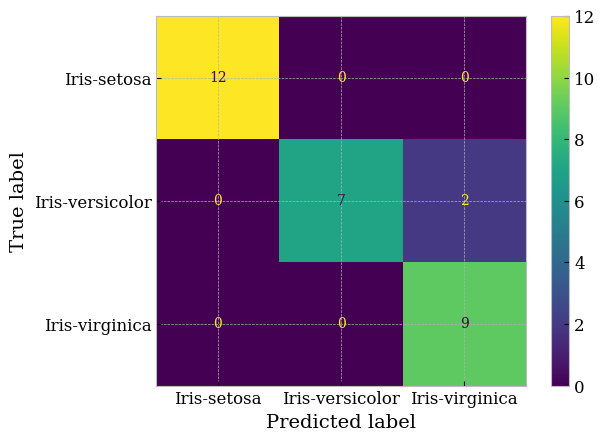

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred)

In [63]:
pd.DataFrame(y_test)[0].value_counts()

0
Iris-setosa        12
Iris-virginica      9
Iris-versicolor     9
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=3)
original_scores = cross_val_score(model, X_train, y_train, cv=cv)
print('AUROC original DS: %.3f' % np.mean(original_scores))

AUROC original DS: 0.957
